# Business Understanding

Syriatel is the leading mobile telecommunications company based in Damascus, Syria. Their vision is that, by focusing solely on customer satisfaction and social responsibility they are able to present products and services of a high standard. 

The goal is to continue to drive the excellent standards of the company by predicting whether a customer will churn from doing business with SyriaTel. 

This will be helped by figuring out identifying the customer likely to churn and negotiate better conditions for them to stay on with the network provider through conversational means.

Targeting ALL customers, likely and not-likely to churn will be costly in revenue to the company and therefore it is more economically beneficial to apply the retention measures to those likely to churn only.

# Data Understanding

In [116]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Train Test Split
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


#DecisionTrees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB 

In [117]:
df = pd.read_csv('churn.csv')

In [118]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [119]:
#Identifying the columns which will be useful to find which ones to drop later

for col in df.columns:
    print (col)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


In [120]:
#Identify the total number of rows and columns

df.shape

(3333, 21)

In [121]:
#Find the types of data in the set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [122]:
#Investigate the dataset for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [123]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [124]:
#The state and customer number columns are unecessary so we will remove those ones

df.drop(columns=['state', 'phone number'], inplace=True, axis=1)

## Visualisations

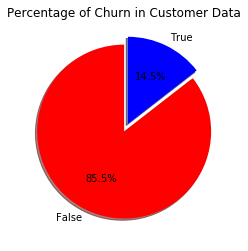

False    2850
True      483
Name: churn, dtype: int64


In [125]:
#Produce a pie chart visualisation to establish the percentage of churners in the dataset

sizes = df['churn'].value_counts(sort=True)

colors = ["red", "blue"]
labels = 'False', 'True'
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Percentage of Churn in Customer Data')
plt.show()

print(sizes)

Having seen the percentage of true churns in the dataset it would now be helpful to produce a heatmap and identify the useful variables 

In [126]:
#Convert the categorical data into numerical data
#International plan and voice mail plan

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])


print (df.dtypes)

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [127]:
#Convert the bools of churn into integers

df['churn'] = df['churn'].astype(int)

In [128]:
#Check to see if the dtype of int has been converted

df.dtypes

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

# Baseline Model

## Logistic Regression

Now I will declare my variables. My target variable (churn) and my predictors are (X)

In [129]:
X = df.drop('churn', axis=1)
y = df['churn']
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [130]:
#Split the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [131]:
#Splitting the data into train and validation datasets

X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

In [132]:
#Scale the 3 datasets 

ss = StandardScaler()

ss.fit(X_train_v) #Fit scaler only on training data

X_train_v = ss.transform(X_train_v)
X_val = ss.transform(X_val)

X_test = ss.transform(X_test)

In [133]:
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_v, y_train_v)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_train_pred = model_log.predict_proba(X_train_v)[:,1]

In [135]:
model_log.score(X_train_v,y_train_v)

0.8574108818011257

In [136]:
#Creating the score for the validation dataset

model_log.score(X_val, y_val)

0.8782771535580525

### Measuring the accuracy and ROC_AUC

Train

In [141]:
# print("Accuracy of model =", accuracy_score(y_train_v, y_train_pred))  #If I want to do this I will have to convert the probabilities (y_train_pred) into actual outcomes of 0s and 1s

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.821474430833826


Validation

In [142]:
y_val_pred = model_log.predict(X_val)

# print("Accuracy of model =", accuracy_score(y_val, y_val_pred))

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.6566003616636528


# Decision Tree

In [147]:
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_leaf=10, 
                               random_state=100, class_weight="balanced")

model_dt.fit(X_train_v, y_train_v)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Train Score

In [150]:
y_train_pred = model_dt.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.7944190802301803


Validation Score

In [151]:
y_val_pred = model_dt.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.73645847823063


### Decision Tree Tuning

In [155]:
### from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=110)
ParamGrid = {'max_depth': range(1,10), 'min_samples_leaf': [5,10,15,20]}
optimalmodel_dt = GridSearchCV(model, ParamGrid, cv=skf, scoring="roc_auc")
optimalmodel_dt.fit(X_train_v, y_train_v)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
 

In [156]:
print('Values of the optimised hyperparameters\n for the best model found:\n',opt_model.best_params_)
optimalmodel_dt.best_score_

Values of the optimised hyperparameters
 for the best model found:
 {'max_depth': 5, 'min_samples_leaf': 15}


0.89030832307004

In [157]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007544,0.003953,0.002669,0.000597,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.596010,0.651170,0.649948,0.632376,0.025719,33
1,0.008815,0.003259,0.003765,0.002332,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.596010,0.651170,0.649948,0.632376,0.025719,33
2,0.006910,0.002587,0.003838,0.000612,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.596010,0.651170,0.649948,0.632376,0.025719,33
3,0.005629,0.001991,0.003939,0.002369,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.596010,0.651170,0.649948,0.632376,0.025719,33
4,0.005958,0.000642,0.002782,0.000422,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.768669,0.818320,0.758583,0.781857,0.026110,29
5,0.018247,0.010584,0.007525,0.005288,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.768669,0.818320,0.758583,0.781857,0.026110,29
6,0.015990,0.007482,0.005197,0.001682,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.768669,0.818320,0.758583,0.781857,0.026110,29
7,0.006286,0.000831,0.004555,0.002968,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.768669,0.818320,0.758583,0.781857,0.026110,29
8,0.014812,0.007103,0.001907,0.000248,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.843534,0.865106,0.816537,0.841726,0.019869,27
9,0.010073,0.003222,0.004210,0.002728,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.840707,0.865106,0.816022,0.840612,0.020038,28


Train Score

In [158]:
y_train_pred = optimalmodel_dt.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.9369857801873782


Validation Score

In [159]:
y_val_pred = optimalmodel_dt.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.8847544860203088


# XG Boost

In [163]:
from xgboost import XGBClassifier

XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [173]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_v, y_train_v)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Train Score

In [174]:
y_train_pred_xgb = model_XGB.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred_xgb))

ROC_AUC of model = 0.9627757509052987


Validation Score

In [179]:
y_val_pred_xgb = model_XGB.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred_xgb))

ROC_AUC of model = 0.8880094588955348


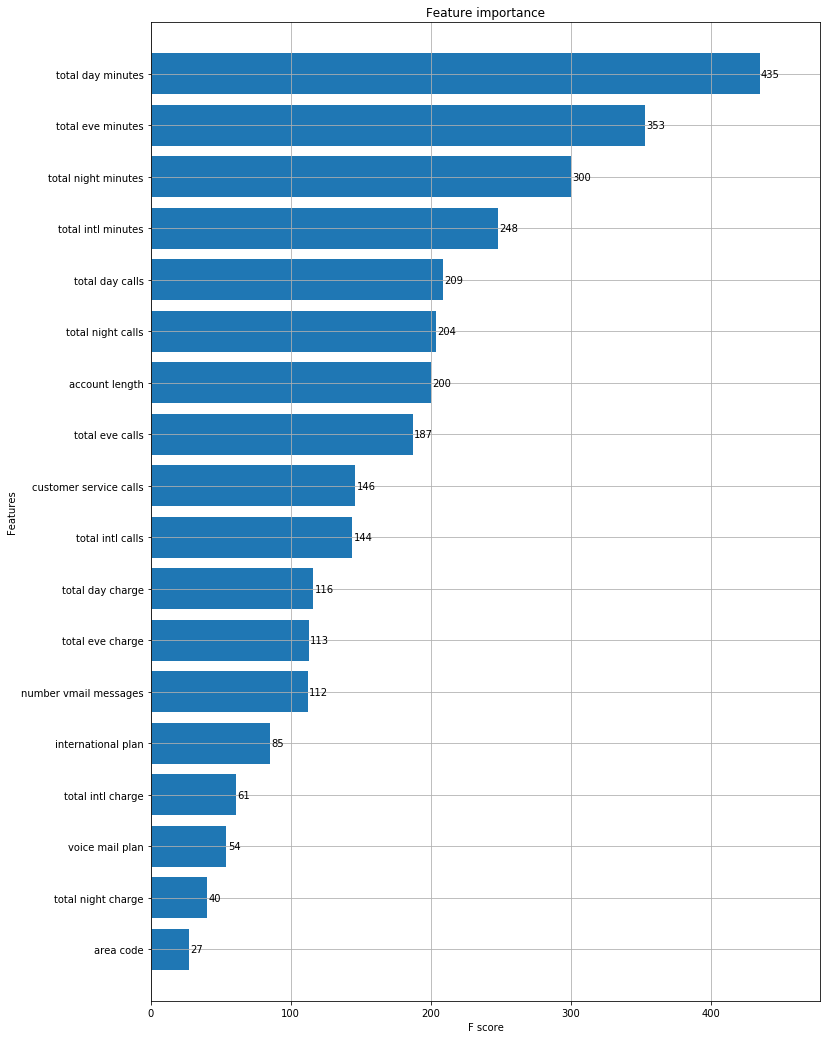

In [185]:
#LEARN HOW XGB CLASSIFIER WORKS. HOW DOES FEATURE IMPORTANCE WORK HERE

#Using more estimators increasing the train speed therefore 100 seemed suitable. 
#Higher max depth overfits the model. 
#subsample is used as the regularization effect
#High learning rates makes algorithm faster but does not yield accurate results thus keeping it to 0.1 is a good number
import xgboost as xgb

XGB = xgb.XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

XGB.fit(X_train,y_train)

#Identifying the important features
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(XGB, max_num_features=50, height=0.8, ax=ax)

plt.show()

This chart gives up a much better representation of the important features useful to us, more so than the correlation matrix. We can deduce that the total day minutes and total evening minutes were critically important variables.
On the other hand, the total international charges and total night charges were of lesser importance. 

These are plotted against the F score in the x-axis because as it is a measure of the tests accuracy and shows a more realistic measure of a tests performance by using both precision and recall.

## XG Boost Hyperparameter Tuning

In [201]:
optimalmodel_xgb = GridSearchCV(model, ParamGrid, cv=skf, scoring="roc_auc")
optimalmodel_xgb.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
 

In [203]:
xgb_bestestimator = optimalmodel_xgb.best_estimator_

Train

In [210]:
optmodel_xgb_predictproba_train = xgb_bestestimator.predict_proba(X_train)

In [211]:
roc_auc_score(y_train, optmodel_xgb_predictproba_train[:,1])

0.9084464975073849

Validation

In [204]:
optmodel_xgb_predictproba = xgb_bestestimator.predict_proba(X_val)

In [209]:
roc_auc_score(y_val, optmodel_xgb_predictproba[:,1])

0.6976491862567813

# Random Forest Classifier

In [213]:
#Instantiate the RF classifier
model_RF = RandomForestClassifier()

In [214]:
model_RF.fit(X_train_v, y_train_v)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train

In [215]:
y_train_pred = model_RF.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 1.0


Validation 

In [216]:
y_val_pred = model_RF.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.8838781471692865


## Random Forest Hyperparameter Tuning

In [217]:
optimalmodel_RF = GridSearchCV(model, ParamGrid, cv=skf, scoring="roc_auc")
optimalmodel_RF.fit(X_train_v, y_train_v)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
 

In [218]:
RF_bestestimator = optimalmodel_RF.best_estimator_

Train

In [219]:
optmodel_RF_predictproba_train = RF_bestestimator.predict_proba(X_train)

In [220]:
roc_auc_score(y_train, optmodel_RF_predictproba_train[:,1])

0.4989871192141574

Validation

In [221]:
optmodel_RF_predictproba_val = RF_bestestimator.predict_proba(X_val)

In [222]:
roc_auc_score(y_val, optmodel_RF_predictproba_val[:,1])

0.8681179579913757

# Evaluation

In [224]:
from sklearn.metrics import classification_report